In [ ]:
%run esi_markethistory.py

Sentry responded with an API error: APIError(Event dropped due to filter)
["Retrying (Retry(total=49, connect=None, read=None, redirect=None)) after connection broken by 'ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))': /latest/markets/10000001/history/?type_id=29668&datasource=tranquility"]


In [4]:
!zcat < history-latest.csv.gz | head











zcat: error writing to output: Broken pipe


In [7]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import seaborn as sns; sns.set()

In [8]:
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

In [9]:
types = pd.read_csv('invTypes.csv.bz2', usecols=['typeID', 'typeName'], index_col='typeID')

In [10]:
types.describe()

,typeName
count,31183
unique,30935
top,Gleaned Information
freq,10


In [11]:
types.dropna(inplace=True)
types

,typeName
typeID,
0,#System
2,Corporation
3,Region
4,Constellation
5,Solar System
6,Sun G5 (Yellow)
7,Sun K7 (Orange)
8,Sun K5 (Red Giant)
9,Sun B0 (Blue)


In [12]:
regions = pd.read_csv('mapRegions.csv.bz2', usecols=['regionID', 'regionName'], index_col='regionID')

In [13]:
regions.describe()

,regionName
count,100
unique,100
top,D-R00023
freq,1


In [14]:
regions

,regionName
regionID,
10000001,Derelik
10000002,The Forge
10000003,Vale of the Silent
10000004,UUA-F4
10000005,Detorid
10000006,Wicked Creek
10000007,Cache
10000008,Scalding Pass
10000009,Insmother


In [15]:
prices = pd.read_csv('history-latest.csv.gz', parse_dates=['date'])

In [16]:
prices.head(5)

,type_id,region_id,date,lowest,highest,average,volume,order_count
0,196,10000001,2016-01-11,159.99,159.99,159.99,5000,1
1,196,10000001,2016-01-12,159.99,159.99,159.99,10100,2
2,196,10000001,2016-01-30,10.00m,10.00m,10.00m,100,1
3,196,10000001,2016-02-05,10.00m,10.00m,10.00m,100,1
4,196,10000001,2016-02-06,10.00m,10.00m,10.00m,100,1


In [17]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247723 entries, 0 to 25247722
Data columns (total 8 columns):
type_id        int64
region_id      int64
date           datetime64[ns]
lowest         float64
highest        float64
average        float64
volume         int64
order_count    int64
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 1.5 GB


In [18]:
prices['revenue'] = prices['average'] * prices['volume']

In [19]:
df = pd.merge(prices, regions, how='left', left_on='region_id', right_index=True)
df = pd.merge(df, types, how='left', left_on='type_id', right_index=True)
df.drop(['region_id', 'type_id'], axis=1, inplace=True)
df.head()

,date,lowest,highest,average,volume,order_count,revenue,regionName,typeName
0,2016-01-11,159.99,159.99,159.99,5000,1,799.95k,Derelik,Proton L
1,2016-01-12,159.99,159.99,159.99,10100,2,1.62M,Derelik,Proton L
2,2016-01-30,10.00m,10.00m,10.00m,100,1,1.00,Derelik,Proton L
3,2016-02-05,10.00m,10.00m,10.00m,100,1,1.00,Derelik,Proton L
4,2016-02-06,10.00m,10.00m,10.00m,100,1,1.00,Derelik,Proton L


In [20]:
print(prices.shape)
print(df.shape)

(25247723, 9)
(25247723, 9)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247723 entries, 0 to 25247722
Data columns (total 9 columns):
date           datetime64[ns]
lowest         float64
highest        float64
average        float64
volume         int64
order_count    int64
revenue        float64
regionName     object
typeName       object
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.7+ GB


In [22]:
df.describe()

,lowest,highest,average,volume,order_count,revenue
count,25.25M,25.25M,25.25M,25.25M,25.25M,25.25M
mean,22.52M,23.77M,23.17M,558.14k,13.20,391.84M
std,421.09M,423.70M,422.18M,63.11M,56.60,26.06G
min,10.00m,10.00m,10.00m,1.00,1.00,10.00m
25%,13.80k,29.00k,23.15k,2.00,1.00,488.00k
50%,320.00k,431.02k,394.24k,5.00,2.00,3.75M
75%,2.70M,3.13M,3.00M,41.00,7.00,30.00M
max,700.00G,700.00G,700.00G,39.22G,18.49k,23.95T


In [23]:
def esi_market_hist(type_id, region_id=10000002):
    url = 'https://esi.tech.ccp.is/latest/markets/{region_id}/history/?type_id={type_id}&datasource=tranquility'.format(
        region_id=region_id, type_id=type_id)
    df = pd.read_json(url).set_index('date')
    return df

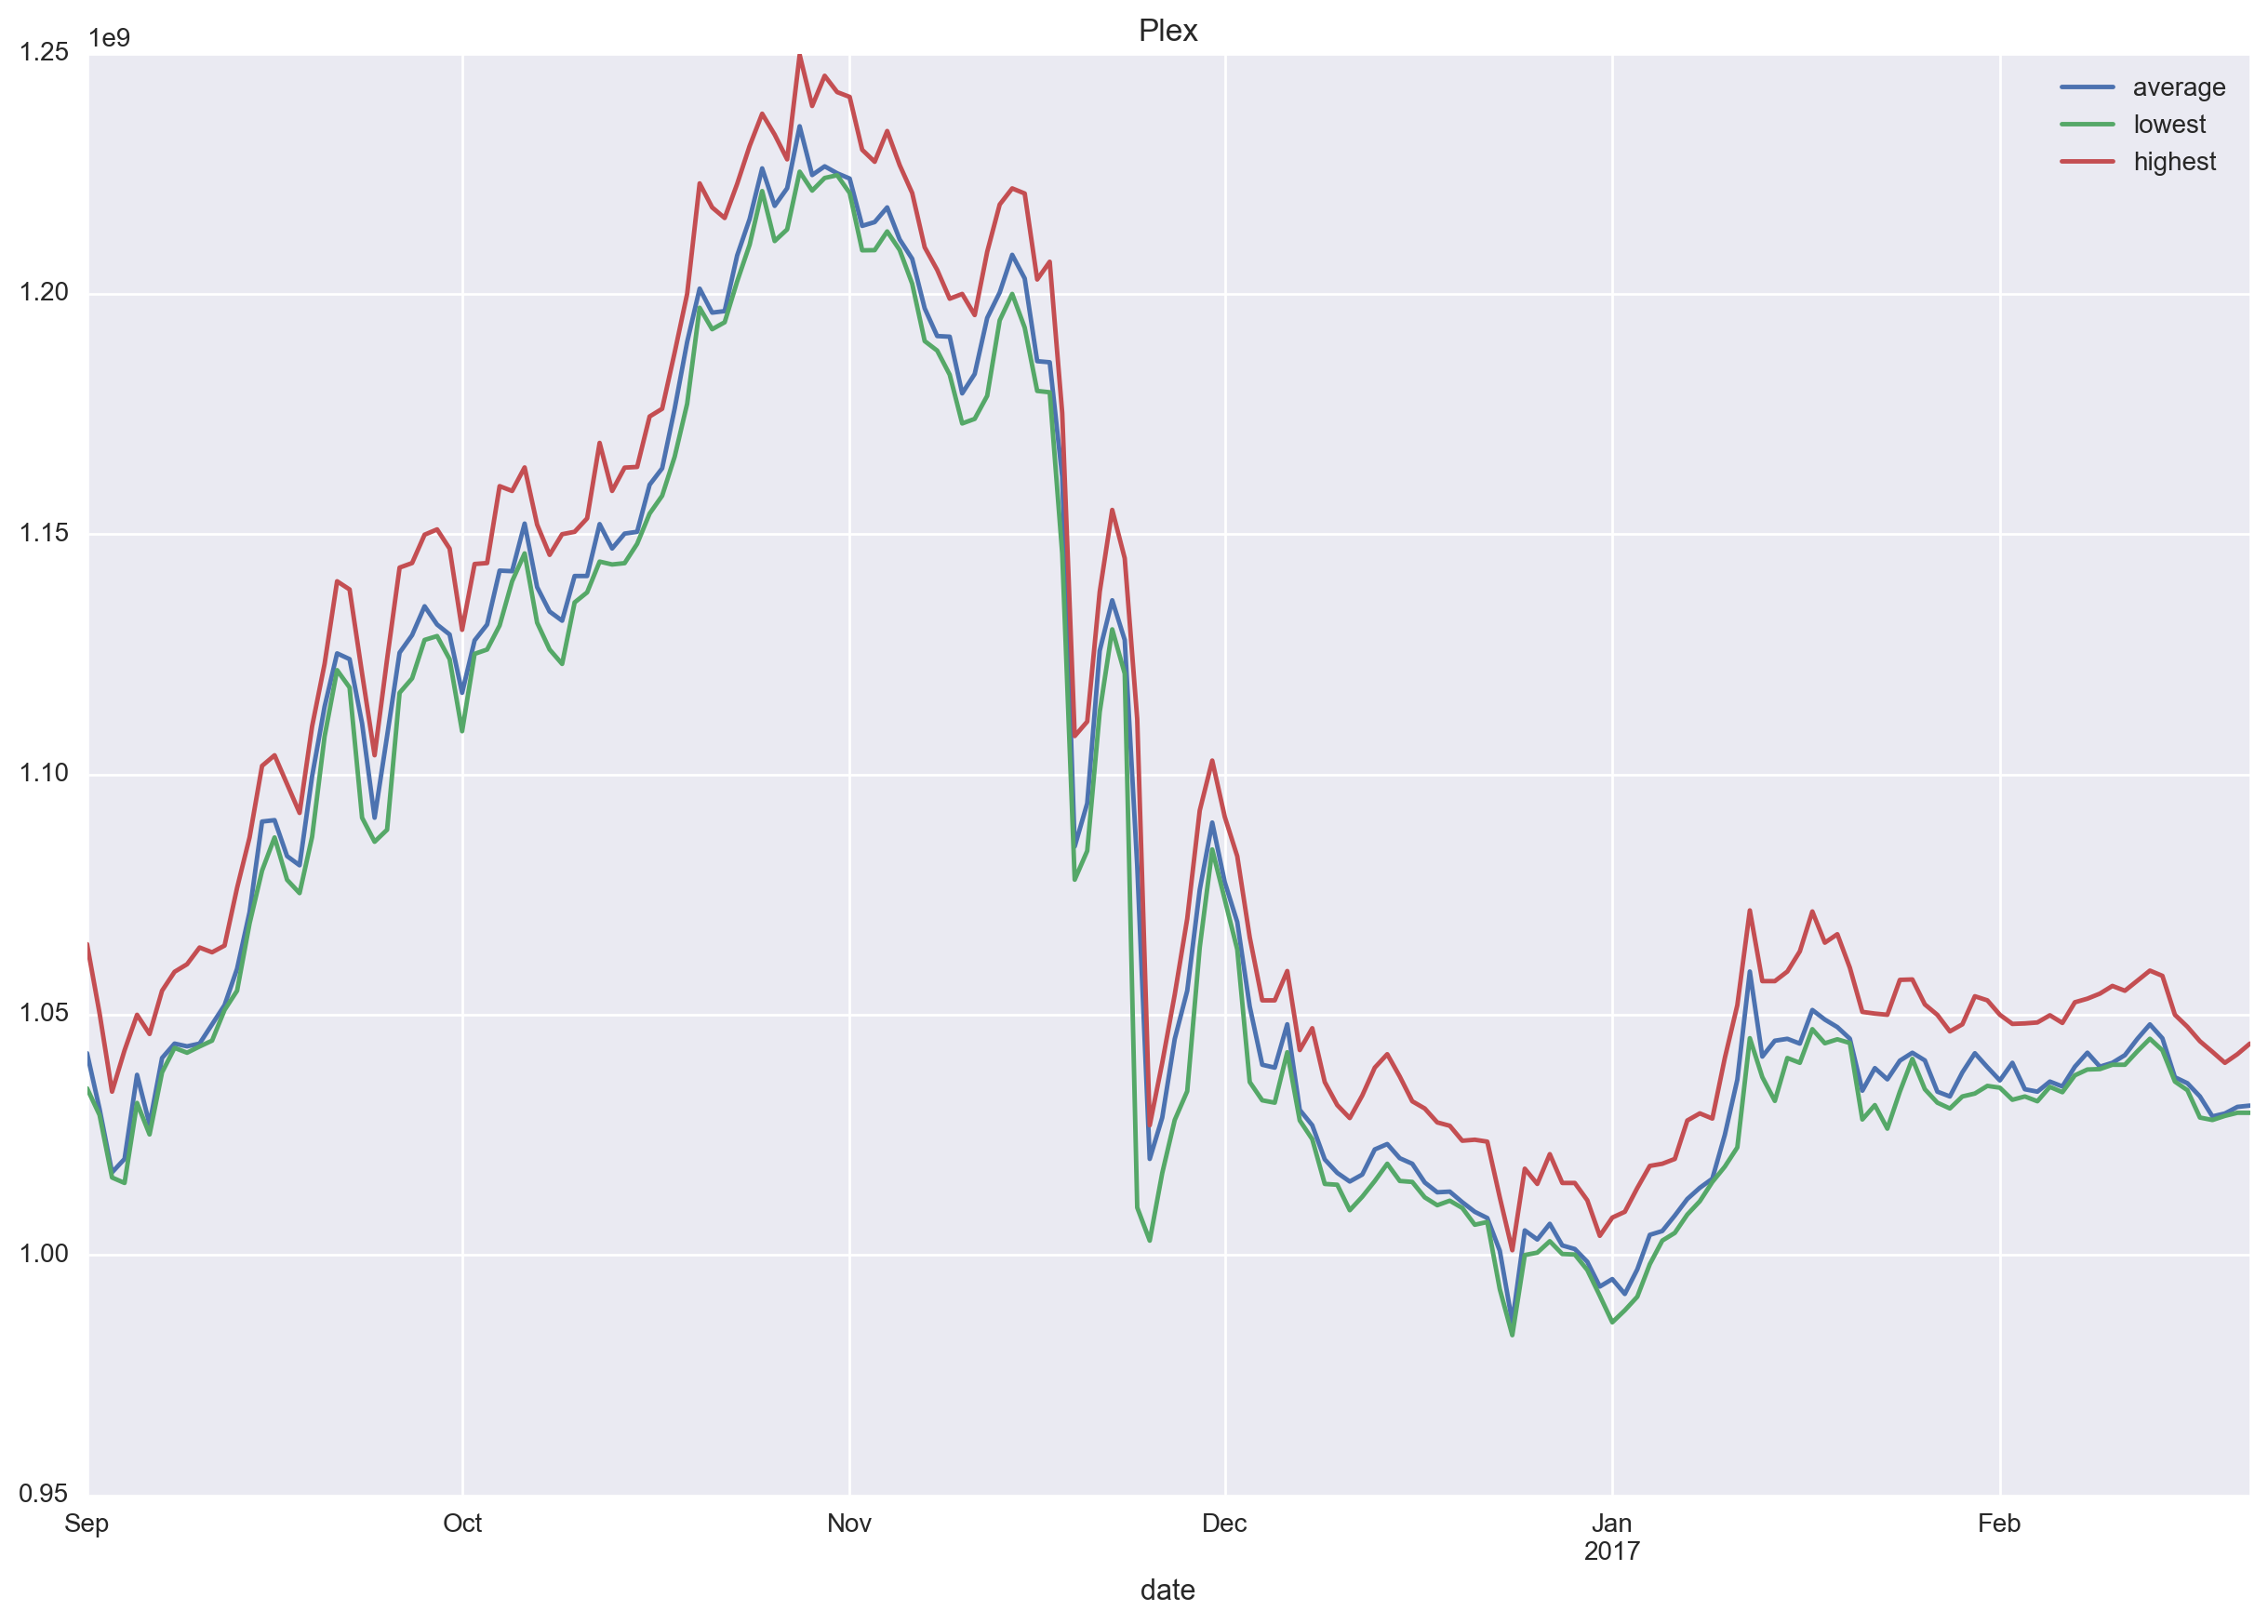

In [24]:
esi_market_hist(29668)['2016-09':][['average','lowest','highest']].plot(figsize=(15,10)).set_title('Plex');

In [25]:
df.nlargest(15, 'revenue')

,date,lowest,highest,average,volume,order_count,revenue,regionName,typeName
3080811,2016-02-09,644.30M,674.40M,657.20M,36443,18494,23.95T,The Forge,Skill Injector
3080812,2016-02-10,635.10M,657.11M,645.80M,33282,16297,21.49T,The Forge,Skill Injector
2493968,2016-02-09,1.26G,1.28G,1.27G,15345,7075,19.52T,The Forge,30 Day Pilot's License Extension (PLEX)
3080813,2016-02-11,631.10M,645.00M,640.00M,23189,10599,14.84T,The Forge,Skill Injector
2493969,2016-02-10,1.24G,1.28G,1.27G,10840,5514,13.75T,The Forge,30 Day Pilot's License Extension (PLEX)
3080816,2016-02-14,606.40M,621.90M,616.00M,22286,9116,13.73T,The Forge,Skill Injector
3080815,2016-02-13,609.80M,624.01M,619.90M,22002,10689,13.64T,The Forge,Skill Injector
3080814,2016-02-12,627.00M,641.90M,632.98M,21297,9914,13.48T,The Forge,Skill Injector
2494046,2016-04-27,983.00M,1.00G,991.80M,12234,3003,12.13T,The Forge,30 Day Pilot's License Extension (PLEX)
3080437,2016-02-09,304.01M,316.00M,308.90M,36362,11167,11.23T,The Forge,Skill Extractor


In [31]:
df.groupby('regionName').agg({'revenue': 'sum'}).sort_values(by='revenue', ascending=False)

,revenue
regionName,
The Forge,7.11P
Domain,1.07P
Sinq Laison,373.94T
Heimatar,196.53T
Lonetrek,164.13T
Metropolis,159.38T
Essence,70.94T
The Citadel,63.50T
Delve,62.02T


In [32]:
wh_regions = regions[regions.index >= 11000000]
wh_regions

,regionName
regionID,
11000001,A-R00001
11000002,A-R00002
11000003,A-R00003
11000004,B-R00004
11000005,B-R00005
11000006,B-R00006
11000007,B-R00007
11000008,B-R00008
11000009,C-R00009


In [104]:
result1 = df.query('date > 2017 and regionName in @wh_regions.regionName')
result1.head()

,date,lowest,highest,average,volume,order_count,revenue,regionName,typeName
25114741,2017-01-30,2.70M,2.70M,2.70M,4,2,10.80M,A-R00001,Strip Miner I
25114742,2017-01-30,29.00M,29.00M,29.00M,1,1,29.00M,A-R00001,Covetor
25114745,2017-01-30,1.40M,1.40M,1.40M,6,2,8.40M,A-R00001,Mining Laser Upgrade II
25114754,2017-01-04,400.00,400.00,400.00,9646,1,3.86M,A-R00003,Nocxium
25114755,2017-01-08,379.00,379.00,379.00,40354,1,15.29M,A-R00003,Nocxium


In [105]:
result1.groupby(['regionName']).agg({
        'volume': 'sum',
        'revenue': ['sum', 'mean']
    }).nlargest(10, [('revenue', 'sum')])

volume  revenue        
                 sum      sum    mean
regionName                           
E-R00028     6682294  120.44G  62.31M
E-R00027     4317046   85.32G  37.16M
B-R00007     6790289   57.24G  35.93M
D-R00019    53845175   51.08G  18.03M
E-R00025     2599806   38.30G  69.76M
D-R00016    59223579   37.94G  11.22M
G-R00031    22807755   36.05G   9.85M
D-R00022    12278511   24.17G  17.96M
D-R00017    19416681   21.57G  60.59M
D-R00021       66995   17.67G  54.21M

In [106]:
result1.groupby(['regionName', 'typeName']).agg({
        'volume': 'sum',
        'revenue': ['sum', 'mean']
    }).nlargest(10, [('revenue', 'sum')])

volume revenue         
                                           sum     sum     mean
regionName typeName                                            
E-R00028   Sleeper Drone AI Nexus         8009  34.19G  727.36M
           Ancient Coordinates Database  17293  22.30G  474.43M
E-R00027   Sleeper Drone AI Nexus         4291  19.78G  420.75M
           Ancient Coordinates Database  12228  16.76G  356.54M
E-R00028   Sleeper Data Library          38335  16.56G  352.39M
B-R00007   Sleeper Drone AI Nexus         3698  16.40G  546.51M
E-R00027   Sleeper Data Library          34062  15.60G  331.90M
B-R00007   Ancient Coordinates Database   8544  11.61G  322.40M
           Sleeper Data Library          21844   9.71G  242.68M
E-R00025   Skill Injector                   15   9.16G    2.29G

In [33]:
# regions with security status > 0
empire = ['Aridia', 'Black Rise', 'The Bleak Lands', 'The Citadel', 'Derelik', 'Devoid', 'Domain', 'Essence',
          'Everyshore', 'The Forge', 'Genesis', 'Heimatar', 'Kador', 'Khanid', 'Kor-Azor', 'Lonetrek',
          'Metropolis','Molden Heath', 'Placid', 'Sinq Laison', 'Solitude', 'Tash-Murkon', 'Verge Vendor']

In [34]:
books = ['Gallente Titan', 'Caldari Titan', 'Amarr Titan', 'Minmatar Titan']

df.query('typeName in @books').groupby(['typeName']).agg({
        'volume': 'sum',
        'revenue': 'sum'
    })

,volume,revenue
typeName,,
Amarr Titan,718,3.97T
Caldari Titan,467,2.59T
Gallente Titan,572,3.17T
Minmatar Titan,466,2.58T


In [41]:
bpo = ['Avatar', 'Erebus', 'Leviathan', 'Ragnarok', 'Keepstar', 'Sotiyo', 'Nyx', 'Hel', 'Wyvern', 'Aeon']
bpo = [s +' Blueprint' for s in bpo]
df.query('typeName in @bpo').groupby(['typeName']).agg({
        'volume': 'sum',
        'revenue': 'sum'
    })

,volume,revenue
typeName,,
Aeon Blueprint,19,351.50G
Avatar Blueprint,5,375.00G
Erebus Blueprint,4,290.00G
Hel Blueprint,359,6.85T
Keepstar Blueprint,5,3.50T
Leviathan Blueprint,5,350.00G
Nyx Blueprint,71,1.43T
Ragnarok Blueprint,12,810.00G
Sotiyo Blueprint,50,5.00T


In [89]:
import datetime
days_before = lambda n: datetime.date.today() - datetime.timedelta(days=n)

result = df.query('date > @days_before(30) and typeName == "Drone Coronary Unit"')
result.groupby(['regionName']).agg({
        'order_count': 'count',
        'volume': 'sum',
        'revenue': 'sum',
        'lowest': 'min',
        'highest': 'max',
        'average': 'mean'
    }).nlargest(10, columns='revenue')

,average,order_count,volume,lowest,revenue,highest
regionName,,,,,,
The Forge,9.31M,27,648060,6.50M,6.05T,12.50M
Domain,9.07M,27,25914,6.00M,234.74G,14.46M
Sinq Laison,7.79M,27,6297,4.00M,51.94G,11.00M
Heimatar,7.87M,23,3886,3.25M,32.05G,12.00M
Cobalt Edge,6.42M,26,3762,1.30M,24.16G,11.00M
Metropolis,7.44M,23,2754,3.51M,22.59G,11.75M
Malpais,7.30M,25,2687,2.00M,21.61G,10.20M
Delve,9.27M,10,1704,4.00M,16.13G,9.60M
Perrigen Falls,4.82M,16,1662,1.00M,12.13G,10.00M


In [96]:
result2 = df.query('date > @days_before(30) and regionName == "The Forge"')
result2.groupby(['typeName']).agg({
        'order_count': 'count',
        'volume': 'sum',
        'revenue': ['sum', 'mean'],
        'average': ['mean', 'std']
    }).nlargest(30, [('revenue', 'sum')])

volume  revenue           \
                                                       sum      sum     mean   
typeName                                                                       
Skill Injector                                      186154  118.21T    4.38T   
30 Day Pilot's License Extension (PLEX)             100314  104.19T    3.86T   
Skill Extractor                                     160558   39.29T    1.46T   
'Excavator' Mining Drone                              5221    8.43T  312.13G   
Drone Coronary Unit                                 648060    6.05T  224.25G   
23rd Tier Overseer's Personal Effects                23591    3.06T  117.80G   
Elite Drone AI                                      442105    2.97T  114.28G   
Tritanium                                     635197603779    2.70T  100.16G   
Mexallon                                       30829201763    2.23T   82.76G   
Drone Cerebral Fragment                            1418349    1.82T   67.31G   
Pithum A-Type Adaptive Invulnerability Field          1324    1.63T   60.51G   
Pithum C-Type Adaptive Invulnerability Field          5340    1.62T   60.14G   
Nitrogen Fuel Block                               69767297    1.58T   58.50G   
Nitrogen Isotopes                               2132314701    1.56T   57.79G   
Logic Circuit                                      2005600    1.52T   56.39G   
Rhea                                                   204    1.48T   54.95G   
Rattlesnake                                           3976    1.48T   54.74G   
Sleeper Drone AI Nexus                              291363    1.46T   53.96G   
Capital Ships                                         3584    1.44T   53.22G   
Imperial Navy Drone Damage Amplifier                 10441    1.36T   50.19G   
Zydrine                                         1178013571    1.30T   48.33G   
Gila                                                  6217    1.29T   47.73G   
Fortizar                                                98    1.22T   48.73G   
Contaminated Lorentz Fluid                         7284621    1.21T   44.99G   
Ferrogel                                          39482237    1.20T   44.38G   
Intact Armor Plates                                 273912    1.17T   43.46G   
Gecko                                                17405    1.14T   42.15G   
'Excavator' Ice Harvesting Drone                       689    1.09T   40.51G   
Capital Industrial Ships                              2118    1.07T   39.81G   
Caldari Navy Ballistic Control System                10731    1.03T   38.32G   

                                              average          order_count  
                                                 mean      std       count  
typeName                                                                    
Skill Injector                                634.95M   11.52M          27  
30 Day Pilot's License Extension (PLEX)         1.04G    3.87M          27  
Skill Extractor                               244.73M    1.95M          27  
'Excavator' Mining Drone                        1.61G   99.22M          27  
Drone Coronary Unit                             9.31M    1.21M          27  
23rd Tier Overseer's Personal Effects         129.96M    1.50M          26  
Elite Drone AI                                  6.72M  958.42k          26  
Tritanium                                        4.28  248.72m          27  
Mexallon                                        72.43     1.93          27  
Drone Cerebral Fragment                         1.30M  258.72k          27  
Pithum A-Type Adaptive Invulnerability Field    1.23G   61.56M          27  
Pithum C-Type Adaptive Invulnerability Field  304.15M    7.56M          27  
Nitrogen Fuel Block                            22.71k    1.13k          27  
Nitrogen Isotopes                              732.51    18.25          27  
Logic Circuit                                 758.75k   30.71k          27  
Rhea                     

In [121]:
grouped = result2.groupby(['typeName']).agg({
        'order_count': 'count',
        'volume': 'sum',
        'revenue': ['sum', 'mean'],
        'average': ['mean', 'std', lambda x: [x.quantile(q=0.2), x.quantile(q=0.8)]],
    })

market_domination = 0.15
grouped['margin cap'] = grouped['average']['std'] / grouped['average']['mean'] * grouped['revenue']['mean'] * 2
grouped['required invest'] = grouped['average']['<lambda>'].apply(lambda x: x[0]) * grouped['volume']['sum'] * market_domination
grouped['potential profit'] = grouped['average']['<lambda>'].apply(lambda x: x[1]-x[0]) * grouped['volume']['sum'] * market_domination
grouped['risk(ROI) %'] = grouped['potential profit'] / grouped['required invest'] * 100

grouped.nlargest(30, 'margin cap')

volume  revenue  \
                                                            sum      sum   
typeName                                                                   
Skill Injector                                           186154  118.21T   
Drone Coronary Unit                                      648060    6.05T   
'Excavator' Mining Drone                                   5221    8.43T   
Elite Drone AI                                           442105    2.97T   
30 Day Pilot's License Extension (PLEX)                  100314  104.19T   
Drone Cerebral Fragment                                 1418349    1.82T   
Skill Extractor                                          160558   39.29T   
Tritanium                                          635197603779    2.70T   
Drone Capillary Fluid                                   3920756  532.22G   
Unit W-634's Modified Drone Navigation Computer               3   20.72G   
'Excavator' Ice Harvesting Drone                            689    1.09T   
Heavy Water                                          1570376471  672.42G   
Unit D-34343's Modified Fighter Support Unit                  3   15.40G   
Mizuro's Modified Dual 650mm Repeating Cannon                 8   23.39G   
Contaminated Lorentz Fluid                              7284621    1.21T   
Chelm's Modified Energized Adaptive Nano Membrane             2   27.00G   
Pithum A-Type Adaptive Invulnerability Field               1324    1.63T   
Azbel                                                       154  819.42G   
Nitrogen Fuel Block                                    69767297    1.58T   
Gist X-Type X-Large Shield Booster                         1810  671.35G   
Hakim's Modified Large Shield Booster                         2    4.10G   
Zydrine                                              1178013571    1.30T   
Imperial Special Ops Field Enhancer - Standard                2    6.40G   
Compressed Bright Spodumain                             2467813  852.66G   
Intact Armor Plates                                      273912    1.17T   
Tairei's Modified Heat Sink                                   6   10.07G   
Scorpion Ishukone Watch SKIN (Permanent)                      3   55.39G   
Compressed Gleaming Spodumain                           1976646  726.65G   
Logic Circuit                                           2005600    1.52T   
Mexallon                                            30829201763    2.23T   

                                                            average           \
                                                      mean     mean      std   
typeName                                                                       
Skill Injector                                       4.38T  634.95M   11.52M   
Drone Coronary Unit                                224.25G    9.31M    1.21M   
'Excavator' Mining Drone                           312.13G    1.61G   99.22M   
Elite Drone AI                                     114.28G    6.72M  958.42k   
30 Day Pilot's License Extension (PLEX)              3.86T    1.04G    3.87M   
Drone Cerebral Fragment                             67.31G    1.30M  258.72k   
Skill Extractor                                      1.46T  244.73M    1.95M   
Tritanium                                          100.16G     4.28  248.72m   
Drone Capillary Fluid                               19.71G  137.73k   31.46k   
Unit W-634's Modified Drone Navigation Computer     10.36G    6.31G    2.55G   
'Excavator' Ice Harvesting Drone                    40.51G    1.60G  160.97M   
Heavy Water                                         24.90G   427.77    65.46   
Unit D-34343's Modified Fighter Support Unit         7.70G    4.60G    2.26G   
Mizuro's Modified Dual 650mm Repeating Cannon        5.85G    2.53G    1.59G   
Contaminated Lorentz Fluid                          44.99G  166.97k   13.57k   
Chelm's Modified Energized Adaptive Nano Membrane   13.50G   13.50G    3.54G   
Pithum A-Type Adaptive Invul

In [127]:
result3 = df.query('date > @days_before(30) and typeName == "30 Day Pilot\'s License Extension (PLEX)"')
result3.groupby(['regionName']).agg({
        'order_count': 'count',
        'volume': 'sum',
        'revenue': 'sum',
        'lowest': 'min',
        'highest': 'max',
        'average': 'mean'
    }).nlargest(10, 'revenue')

,average,order_count,volume,lowest,revenue,highest
regionName,,,,,,
The Forge,1.04G,27,100314,1.03G,104.19T,1.06G
Domain,1.03G,27,15289,1.02G,15.70T,1.05G
Sinq Laison,1.01G,27,5606,999.91M,5.68T,1.05G
Heimatar,1.02G,27,3060,597.80M,3.13T,1.06G
Metropolis,1.03G,27,2623,1.01G,2.69T,1.06G
Delve,1.03G,27,1672,995.22M,1.72T,1.10G
Essence,1.02G,27,1486,1.00G,1.52T,1.08G
Lonetrek,1.03G,27,1438,1.01G,1.48T,1.08G
Verge Vendor,1.01G,27,1394,105.00M,1.41T,1.09G


In [37]:
top7 = df.groupby('regionName').agg({'revenue': 'sum'}).nlargest(7, 'revenue')
result4 = df.query('regionName in @top7.index').groupby(['date', 'regionName']).agg({'revenue': 'sum'})

In [38]:
top7

,revenue
regionName,
The Forge,7.11P
Domain,1.07P
Sinq Laison,373.94T
Heimatar,196.53T
Lonetrek,164.13T
Metropolis,159.38T
Essence,70.94T


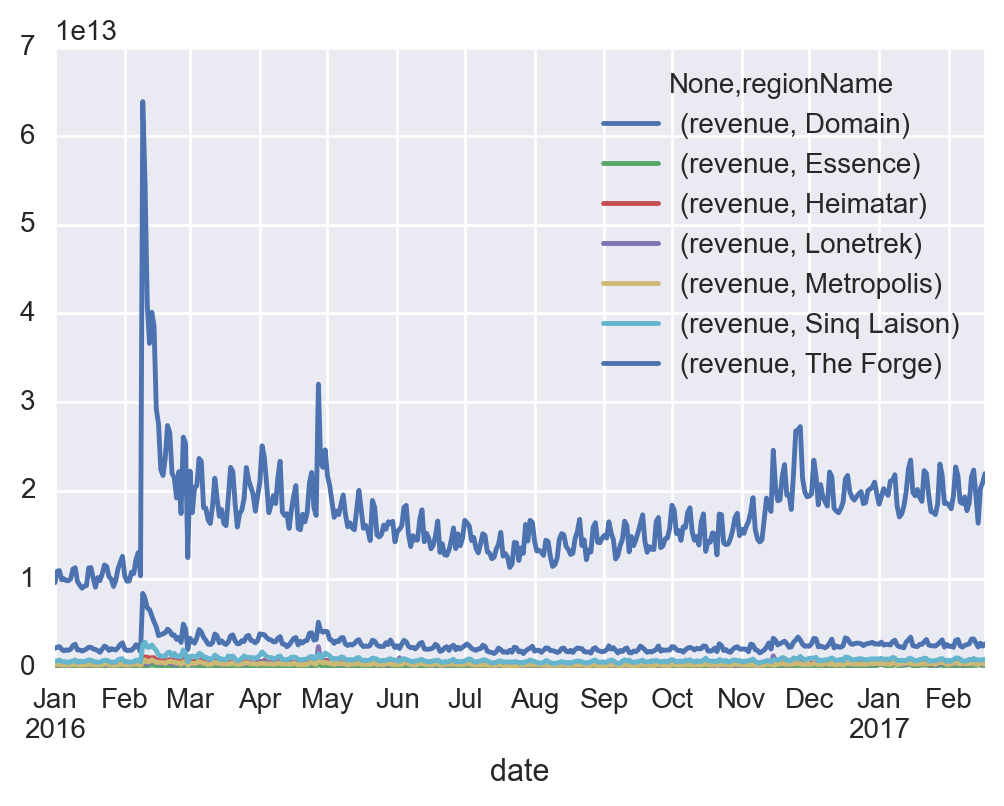

In [45]:
result4.unstack().plot();

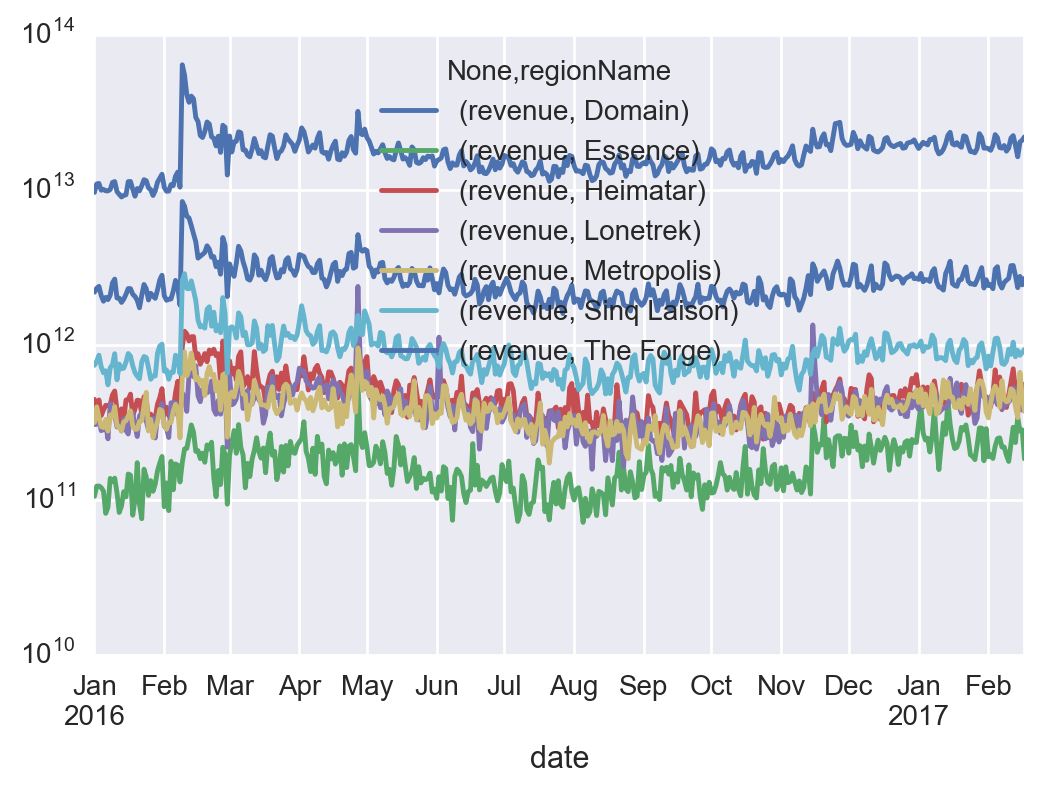

In [44]:
result4.unstack().plot(logy=True);